<a href="https://colab.research.google.com/github/noviantisafitri/MiniProject-DataMining/blob/main/Data_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ANALISIS FAKTOR-FAKTOR YANG MEMPENGARUHI KONSUMSI ALKOHOL PADA REMAJA**

#**Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis dari analisis ini adalah untuk menyelidiki dan memahami apa saja faktor yang mungkin memengaruhi perilaku konsumsi alkohol di kalangan remaja serta mengidentifikasi kelompok remaja yang lebih rentan terhadap konsumsi alkohol sehingga dapat merencenakan strategi yang efektif untuk mengurangi maupun mencegah konsumsi alkohol pada remaja. Selain itu, hasil analisis ini juga dapat memberikan wawasan bagi pihak-pihak terkait dalam upaya pencegahan konsumsi alkohol pada remaja. Dengan demikian, analisis ini diharapkan dapat memberikan kontribusi positif dalam upaya mengurangi dampak negatif konsumsi alkohol pada remaja.

##**Assess Situation**

Konsumsi alkohol pada remaja merupakan fenomena yang memerlukan perhatian serius karena memiliki potensi risiko jangka panjang terhadap kesehatan fisik, kesejahteraan mental, dan perilaku sosial. Konsumsi alkohol pada remaja dapat menyebabkan kecanduan, serta mempengaruhi perkembangan otak dan sistem saraf pusat, yang dapat berdampak pada kemampuan belajar, dan pengambilan keputusan. Selain itu, konsumsi alkohol pada remaja juga dapat meningkatkan risiko terjadinya kecelakaan, kekerasan, dan perilaku berisiko lainnya, seperti perilaku seksual yang tidak aman dan penggunaan narkoba.

##**Data Mining Goals**

Tujuan dari analisis data ini adalah untuk mengidentifikasi faktor-faktor yang berpengaruh terhadap konsumsi alkohol pada remaja dan mengetahui faktor apa saja yang paling berpengaruh terhadap perilaku konsumsi alkohol tersebut. Selain itu, analisis data mining juga dapat membantu dalam mengidentifikasi pola dalam perilaku konsumsi alkohol pada remaja, serta memprediksi risiko konsumsi alkohol pada remaja di masa depan. Sehingga dapat membantu dalam pengembangan program pencegahan yang lebih efektif dan tepat sasaran, serta membantu dalam pengambilan keputusan yang lebih baik dalam mengatasi masalah konsumsi alkohol pada remaja.

##**Project Plan**

Rencana proyek ini dimulai dari mengumpulkan data yang relevan terkait konsumsi alkohol pada remaja dari sumber yang tersedia. Setelah itu, dataset akan dilakukan pembersihan dan preprocessing data untuk memastikan keakuratan dan konsistensi dataset yang akan digunakan dalam analisis. Langkah selanjutnya adalah melakukan eksplorasi data untuk memahami hubungan antar variabel dan mengembangkan model prediktif. Dalam tahap ini, analisis data mining akan dilakukan untuk mengidentifikasi faktor-faktor yang berpengaruh terhadap konsumsi alkohol pada remaja dan mengetahui faktor apa saja yang paling berpengaruh terhadap perilaku konsumsi alkohol tersebut. Hasil dari analisis data mining akan digunakan untuk menyusun langkah-langkah yang tepat untuk mengurangi dampak negatif konsumsi alkohol pada remaja. Dengan demikian, rencana proyek ini akan membantu dalam pengembangan program pencegahan yang lebih efektif dan tepat sasaran untuk mengurangi risiko konsumsi alkohol pada remaja.

#**DATA UNDERSTANDING**

Sumber Data: [Student Alcohol Consumption](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption)

Data tersebut berasal dari sebuah survei terhadap siswa yang mengikuti kursus matematika dan bahasa Portugis di sekolah menengah. Data ini berisi informasi sosial, gender, dan studi yang menarik tentang siswa.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/noviantisafitri/MiniProject-DataMining/main/student-data.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


##**Describe Data**

####Informasi Dasar

In [4]:
df.shape

(395, 33)

Berdasarkan output diatas, terlihat jika data tersebut terdiri dari 33 kolom dan 395 baris.

####Informasi Lanjutan

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Berikut adalah penjelasan untuk setiap kolom dalam DataFrame:

1. **school**: Nama sekolah. Jumlah barisnya adalah 395 dan tipe datanya adalah object, menunjukkan bahwa nilai-nilai dalam kolom ini adalah string atau teks.

2. **sex**: Jenis Kelamin (misalnya, "M" untuk laki-laki dan "F" untuk perempuan). Jumlah barisnya adalah 395 dan tipe datanya adalah object.

3. **age**: Usia siswa. Jumlah barisnya adalah 395 dan tipe datanya adalah int64, menunjukkan bahwa nilai-nilai dalam kolom ini adalah bilangan bulat.

4. **address** : Jenis alamat tempat tinggal siswa (misalnya, "U" untuk urban dan "R" untuk rural). Jumlah barisnya adalah 395 dan tipe datanya adalah object.

5. **famsize** : Jumlah keluarga siswa (misalnya, "LE3" untuk kurang dari atau sama dengan 3 dan "GT3" untuk lebih besar dari 3). Jumlah barisnya adalah 395 dan tipe datanya adalah object.

6. **Pstatus** : Status hubungan orang tua siswa (misalnya, "T" untuk tinggal bersama dan "A" untuk terpisah). Jumlah barisnya adalah 395 dan tipe datanya adalah object.

7. **Medu** : Tingkat pendidikan ibu siswa dalam skala 0 hingga 4. Jumlah barisnya adalah 395 dan tipe datanya adalah int64.

8. **Fedu** : Tingkat pendidikan ayah siswa dalam skala 0 hingga 4. Jumlah barisnya adalah 395 dan tipe datanya adalah int64.

9. **Mjob** : Pekerjaan ibu siswa. Jumlah barisnya adalah 395 dan tipe datanya adalah object.

10. **Fjob** : Pekerjaan ayah siswa. Jumlah barisnya adalah 395 dan tipe datanya adalah object.

11. **reason** : Alasan memilih sekolah saat ini. Jumlah barisnya adalah 395 dan tipe datanya adalah object.

12. **guardian** : Wali siswa. Jumlah barisnya adalah 395 dan tipe datanya adalah object.

13. **traveltime** : Waktu tempuh dari rumah ke sekolah. Jumlah barisnya adalah 395 dan tipe datanya adalah int64.

14. **studytime** : Jumlah waktu belajar mingguan siswa. Jumlah barisnya adalah 395 dan tipe datanya adalah int64.

15. **failures** : Jumlah kegagalan kelas sebelumnya siswa. Jumlah barisnya adalah 395 dan tipe datanya adalah int64.

16. **schoolsup** : Dukungan pendidikan tambahan dari sekolah. Jumlah barisnya adalah 395 dan tipe datanya adalah object.

17. **famsup** : Dukungan pendidikan tambahan dari keluarga. Jumlah barisnya adalah 395 dan tipe datanya adalah object.

18. **paid** : Kelas berbayar tambahan. Jumlah barisnya adalah 395 dan tipe datanya adalah object.

19. **activities** : Partisipasi dalam aktivitas ekstrakurikuler. Jumlah barisnya adalah 395 dan tipe datanya adalah object.

20. **nursery** : Partisipasi dalam program pendidikan pra-sekolah. Jumlah barisnya adalah 395 dan tipe datanya adalah object.

21. **higher** : Keinginan siswa untuk melanjutkan pendidikan tinggi. Jumlah barisnya adalah 395 dan tipe datanya adalah object.

22. **internet**: Akses internet di rumah siswa. Jumlah barisnya adalah 395 dan tipe datanya adalah object.

23. **romantic**: Status hubungan romantis siswa. Jumlah barisnya adalah 395 dan tipe datanya adalah object.

24. **famrel**: Kualitas hubungan keluarga siswa dalam skala 1 hingga 5. Jumlah barisnya adalah 395 dan tipe datanya adalah int64.

25. **freetime**: Jumlah waktu luang harian siswa dalam skala 1 hingga 5. Jumlah barisnya adalah 395 dan tipe datanya adalah int64.

26. **goout** : Frekuensi keluar bersama teman dalam skala 1 hingga 5. Jumlah barisnya adalah 395 dan tipe datanya adalah int64.

27. **Dalc** : Konsumsi alkohol selama hari kerja dalam skala 1 hingga 5. Jumlah barisnya adalah 395 dan tipe datanya adalah int64.

28. **Walc** : Konsumsi alkohol selama akhir pekan dalam skala 1 hingga 5. Jumlah barisnya adalah 395 dan tipe datanya adalah int64.

29. **health** : Status kesehatan siswa dalam skala 1 hingga 5. Jumlah barisnya adalah 395 dan tipe datanya adalah int64.

30. **absences** : Jumlah absensi siswa. Jumlah barisnya adalah 395 dan tipe datanya adalah int64.

31. **G1** : Nilai akademik siswa pada periode pertama dalam skala 0 hingga 20. Jumlah barisnya adalah 395 dan tipe datanya adalah int64.

32. **G2** : Nilai akademik siswa pada periode kedua dalam skala 0 hingga 20. Jumlah barisnya adalah 395 dan tipe datanya adalah int64.
33. **G3** : Nilai akademik siswa pada periode ketiga dalam skala 0 hingga 20. Jumlah barisnya adalah 395 dan tipe datanya adalah int64.

####Informasi Statistik Deskriptif

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Berikut adalah deskripsi untuk setiap kolom data dalam tabel:

1. **age** : Rata-rata usia siswa dalam data adalah 16.70 tahun dengan standar deviasi sekitar 1.28 tahun. Rentang usia siswa adalah dari 15 hingga 22 tahun. Kuartil pertama (25%) dari usia siswa adalah 16 tahun, sementara kuartil ketiga (75%) adalah 18 tahun. Ini menunjukkan bahwa mayoritas siswa dalam dataset berusia antara 16 hingga 18 tahun.

2. **Medu** : Rata-rata tingkat pendidikan ibu siswa dalam data adalah sekitar 2.75 dengan standar deviasi sekitar 1.09. Tingkat pendidikan ibu terendah adalah 0 (tidak berpendidikan) dan tertinggi adalah 4 (pendidikan tinggi). Kuartil pertama (25%) dari tingkat pendidikan ibu adalah 2, sementara kuartil ketiga (75%) adalah 4.

3. **Fedu** : Rata-rata tingkat pendidikan ayah siswa dalam data adalah sekitar 2.52 dengan standar deviasi sekitar 1.09. Tingkat pendidikan ayah terendah adalah 0 (tidak berpendidikan) dan tertinggi adalah 4 (pendidikan tinggi). Kuartil pertama (25%) dari tingkat pendidikan ayah adalah 2, sementara kuartil ketiga (75%) adalah 3.

4. **traveltime** : Rata-rata waktu tempuh dari rumah ke sekolah dalam data adalah sekitar 1.45 jam dengan standar deviasi sekitar 0.70 jam. Waktu tempuh terpendek adalah 1 jam dan yang terpanjang adalah 4 jam. Kuartil pertama (25%) dari waktu tempuh adalah 1 jam, sementara kuartil ketiga (75%) adalah 2 jam.

5. **studytime** : Rata-rata waktu belajar siswa dalam data adalah sekitar 2.04 jam per minggu dengan standar deviasi sekitar 0.84 jam. Waktu belajar terpendek adalah 1 jam dan yang terpanjang adalah 4 jam. Kuartil pertama (25%) dari waktu belajar adalah 1 jam, sementara kuartil ketiga (75%) adalah 2 jam.

6. **failures** : Rata-rata jumlah kegagalan kelas sebelumnya siswa dalam data adalah sekitar 0.33 dengan standar deviasi sekitar 0.74. Mayoritas siswa tidak memiliki kegagalan kelas sebelumnya, karena kuartil pertama (25%) dan median (50%) adalah 0, sementara kuartil ketiga (75%) adalah 0.

7. **famrel** : Rata-rata kualitas hubungan keluarga siswa dalam data adalah sekitar 3.94 dengan standar deviasi sekitar 0.90. Rentang nilai kualitas hubungan keluarga adalah dari 1 hingga 5, di mana 1 menunjukkan kualitas yang buruk dan 5 menunjukkan kualitas yang baik. Kuartil pertama (25%) dari kualitas hubungan keluarga adalah 4, sementara kuartil ketiga (75%) adalah 5.

8. **freetime** : Rata-rata waktu luang harian siswa dalam data adalah sekitar 3.24 dengan standar deviasi sekitar 1.00. Rentang waktu luang adalah dari 1 hingga 5, di mana 1 menunjukkan waktu luang yang sangat sedikit dan 5 menunjukkan waktu luang yang sangat banyak. Kuartil pertama (25%) dari waktu luang adalah 3, sementara kuartil ketiga (75%) adalah 4.

9. **goout** : Rata-rata frekuensi keluar bersama teman siswa dalam data adalah sekitar 3.11 dengan standar deviasi sekitar 1.11. Rentang frekuensi keluar adalah dari 1 hingga 5, di mana 1 menunjukkan frekuensi yang sangat

10. **Dalc** : Rata-rata konsumsi alkohol selama hari kerja siswa dalam data adalah sekitar 1.48 dengan standar deviasi sekitar 0.89. Rentang nilai konsumsi alkohol selama hari kerja adalah dari 1 hingga 5, di mana 1 menunjukkan konsumsi alkohol yang sangat rendah dan 5 menunjukkan konsumsi alkohol yang sangat tinggi. Kuartil pertama (25%) dari konsumsi alkohol selama hari kerja adalah 1, sementara kuartil ketiga (75%) adalah 2.

11. **Walc** : Rata-rata konsumsi alkohol selama akhir pekan siswa dalam data adalah sekitar 2.29 dengan standar deviasi sekitar 1.29. Rentang nilai konsumsi alkohol selama akhir pekan adalah dari 1 hingga 5, di mana 1 menunjukkan konsumsi alkohol yang sangat rendah dan 5 menunjukkan konsumsi alkohol yang sangat tinggi. Kuartil pertama (25%) dari konsumsi alkohol selama akhir pekan adalah 1, sementara kuartil ketiga (75%) adalah 3.

12. **health** : Rata-rata status kesehatan siswa dalam data adalah sekitar 3.55 dengan standar deviasi sekitar 1.39. Rentang nilai status kesehatan adalah dari 1 hingga 5, di mana 1 menunjukkan status kesehatan yang buruk dan 5 menunjukkan status kesehatan yang sangat baik. Kuartil pertama (25%) dari status kesehatan adalah 3, sementara kuartil ketiga (75%) adalah 5.

13. **absences** : Rata-rata jumlah absensi siswa dalam data adalah sekitar 5.71 dengan standar deviasi sekitar 8.00. Rentang jumlah absensi adalah dari 0 hingga 75, dengan kuartil pertama (25%) adalah 0 dan kuartil ketiga (75%) adalah 8. Ini menunjukkan bahwa sebagian besar siswa memiliki sedikit absensi, tetapi ada beberapa yang memiliki jumlah absensi yang tinggi.

14. **G1** : Rata-rata nilai akademik siswa pada periode pertama dalam data adalah sekitar 10.91 dengan standar deviasi sekitar 3.32. Rentang nilai adalah dari 3 hingga 19, dengan kuartil pertama (25%) adalah 8 dan kuartil ketiga (75%) adalah 13.

15. **G2** : Rata-rata nilai akademik siswa pada periode kedua dalam data adalah sekitar 10.71 dengan standar deviasi sekitar 3.76. Rentang nilai adalah dari 0 hingga 19, dengan kuartil pertama (25%) adalah 9 dan kuartil ketiga (75%) adalah 13.

16. **G3** : Rata-rata nilai akhir siswa dalam data adalah sekitar 10.42 dengan standar deviasi sekitar 4.58. Rentang nilai adalah dari 0 hingga 20, dengan kuartil pertama (25%) adalah 8 dan kuartil ketiga (75%) adalah 14.

##**Exploratory Data Analysis**

In [7]:
# data numerik
numeric_data = df.select_dtypes(include=['int64'])
numeric_data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9
391,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16
392,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7
393,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10


In [8]:
# data kategori
categorical_data = df.select_dtypes(include=['object'])
categorical_data

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


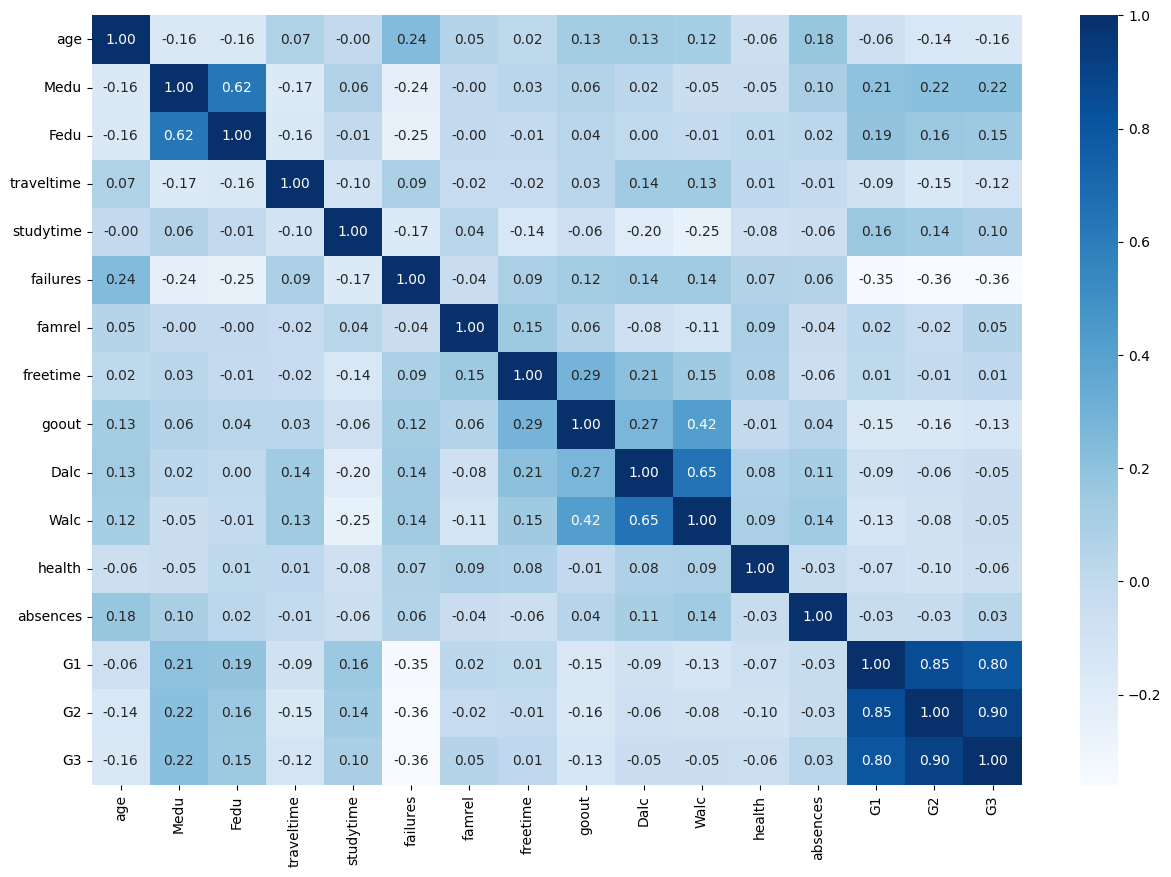

In [9]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cbar=True, cmap="Blues")
plt.gcf().set_size_inches(15, 10)
plt.show()

Berdasarkan hasil visualisasi korelasi di atas, terlihat bahwa setiap variabel memiliki nilai yang menggambarkan hubungannya dengan variabel lainnya. Sebagai contoh, variabel kegiatan di luar sekolah (goout) menunjukkan korelasi yang signifikan dengan konsumsi alkohol pada akhir pekan (Walc).

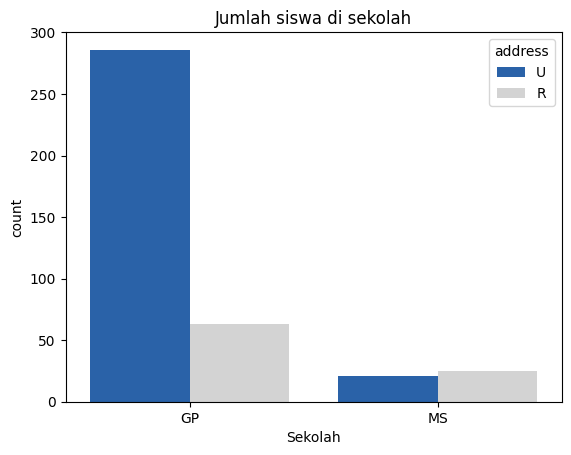

In [10]:
# Bagaimana jumlah siswa disekolah berdasarkan tempat tinggal (pedesaan/perkotaan)?
sns.countplot(x='school', data=df, hue='address', palette=['#1560BD','lightgrey'])
plt.title('Jumlah siswa di sekolah')
plt.xlabel("Sekolah")
plt.show()

Hasil visualisasi tersebut menunjukkan bahwa mayoritas siswa dari sekolah Gabriel Pereira (GP) tinggal di daerah perkotaan (U), sementara mayoritas siswa dari sekolah Mousinho da Silveira (MS) tinggal di daerah pedesaan (R). Hal ini menunjukkan adanya hubungan negatif antara sekolah dan tempat tinggal siswa, dimana jika siswa berasal dari sekolah Gabriel Pereira, kemungkinan besar mereka tinggal di daerah perkotaan, dan sebaliknya. Ini menunjukkan bahwa karakteristik sekolah dapat mempengaruhi tempat tinggal siswa, di mana sekolah Gabriel Pereira lebih cenderung menarik siswa dari daerah perkotaan, sementara sekolah Mousinho da Silveira lebih cenderung menarik siswa dari daerah pedesaan.

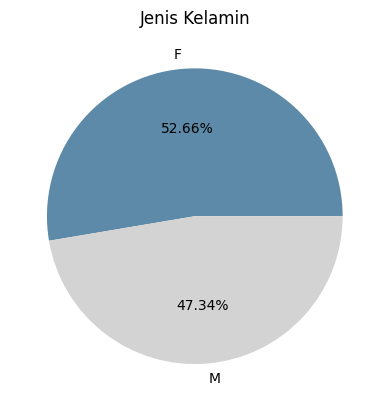

In [11]:
# Bagaimana distribusi jenis kelamin untuk siswa, apakah didominasi oleh laki-laki atau perempuan?
gender_counts = df['sex'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.2f%%', startangle=360,colors=['lightgrey' if x == df['sex'].value_counts().min() else '#5D8AA8' for x in df['sex'].value_counts()])
plt.title("Jenis Kelamin")
plt.ylabel("")
plt.show()

Berdasarkan visualisasi tersebut, dapat disimpulkan bahwa jumlah siswa perempuan mendominasi di kedua sekolah, dengan proporsi sekitar 52.66% dari total siswa. Hal ini menunjukkan bahwa jumlah siswa perempuan lebih banyak dibandingkan jumlah siswa laki-laki di sekolah-sekolah tersebut.

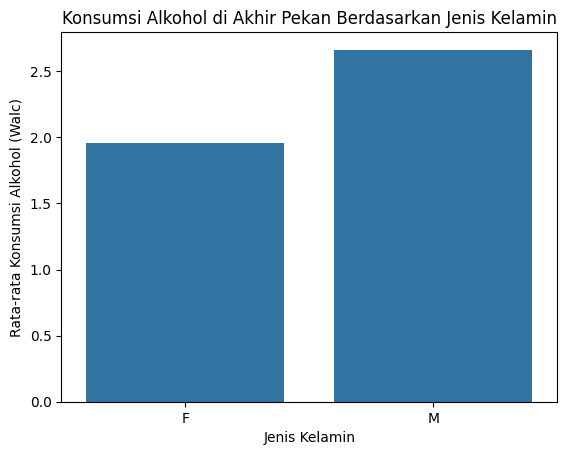

In [12]:
2# Bagaimana tingkat konsumsi alkohol di akhir pekan berdasarkan jenis kelamin?
sns.barplot(x='sex', y='Walc', data=df, errorbar=None)
plt.title('Konsumsi Alkohol di Akhir Pekan Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Rata-rata Konsumsi Alkohol (Walc)')
plt.show()

Berdasarkan hasil visualisasi di atas, terlihat bahwa frekuensi konsumsi alkohol di akhir pekan siswa dengan jenis kelamin laki-laki (M) cenderung lebih tinggi daripada siswa dengan jenis kelamin perempuan (F).Jadi, jenis kelamin siswa memiliki pengaruh terhadap frekuensi konsumsi alkohol di akhir pekan. Dapat disimpulkan bahwa terdapat hubungan positif antara jenis kelamin dan frekuensi konsumsi alkohol di akhir pekan, yang berarti ketika jenis kelamin siswa adalah laki-laki, kemungkinan untuk mengonsumsi alkohol di akhir pekan cenderung lebih tinggi.


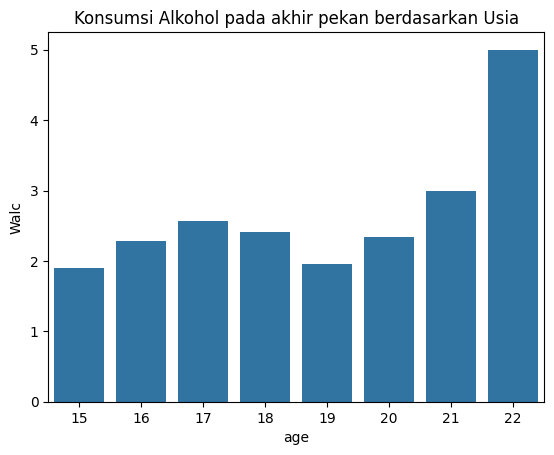

In [13]:
# Bagaimana tingkat konsumsi alkohol di akhir pekan berdasarkan usia?
sns.barplot(x='age', y='Walc', data=df, errorbar=None)
plt.title('Konsumsi Alkohol pada akhir pekan berdasarkan Usia')
plt.show()

Dari grafik di atas, terlihat bahwa terdapat kecenderungan bahwa semakin tua siswa, mereka cenderung mengonsumsi lebih banyak alkohol di akhir pekan. Jadi usia (age) kemungkinan berpengaruh positif terhadap konsumsi alkohol pada akhir pekan (Walc). Karena semakin bertambahnya usia siswa, mereka cenderung lebih sering mengkonsumsi alkohol pada akhir pekan.

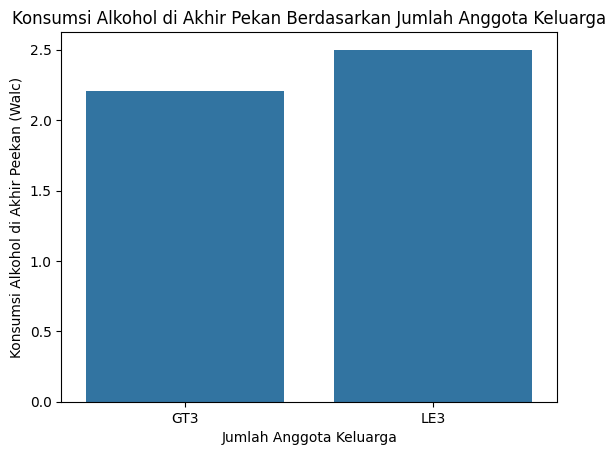

In [14]:
# Apakah jumlah anggota keluarga siswa berpotensi memengaruhi tingkat konsumsi alkohol di akhir pekan?
sns.barplot(x='famsize', y='Walc', data=df, errorbar=None)
plt.title('Konsumsi Alkohol di Akhir Pekan Berdasarkan Jumlah Anggota Keluarga')
plt.xlabel('Jumlah Anggota Keluarga')
plt.ylabel('Konsumsi Alkohol di Akhir Peekan (Walc)')
plt.show()

Berdasarkan grafik diatas, terlihat bahwa siswa yang berasal dari keluarga dengan jumlah anggota lebih dari 3 (GT3) cenderung memiliki tingkat konsumsi alkohol pada akhir pekan (Walc) yang lebih rendah dibandingkan dengan siswa yang berasal dari keluarga dengan jumlah anggota kurang dari atau sama dengan 3 (LE3).Ketika jumlah anggota keluarga meningkat, maka tingkat konsumsi alkohol pada akhir pekan cenderung menurun. Meskipun perbedaan dalam tingkat konsumsi alkohol antara dua kelompok tersebut tidak terlalu signifikan.

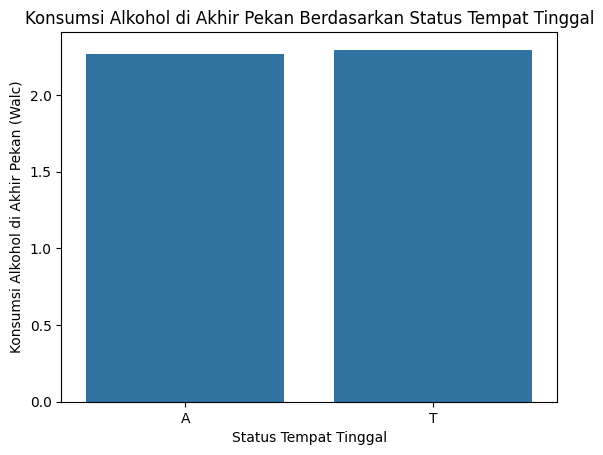

In [15]:
# Apakah status tempat tinggal siswa mempengaruhi tingkat konsumsi alkohol di akhir pekan?
sns.barplot(x='Pstatus', y='Walc', data=df, errorbar=None)
plt.title('Konsumsi Alkohol di Akhir Pekan Berdasarkan Status Tempat Tinggal')
plt.xlabel('Status Tempat Tinggal')
plt.ylabel('Konsumsi Alkohol di Akhir Pekan (Walc)')
plt.show()

Berdasarkan grafik tersebut, terlihat bahwa status tempat tinggal siswa tidak memiliki pengaruh yang signifikan terhadap tingkat konsumsi alkohol pada akhir pekan. Namun, siswa yang tinggal bersama orang tua (T) cenderung memiliki tingkat konsumsi alkohol pada akhir pekan yang sedikit lebih tinggi dibandingkan siswa yang tinggal sendiri (A).

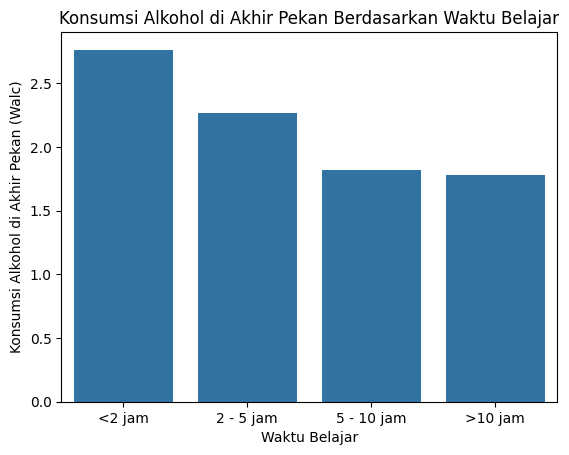

In [16]:
# Apakah siswa yang memiliki waktu belajar (study_time) yang lebih tinggi cenderung lebih jarang dalam mengkonsumsi alkohol di akhir pekan?
label = ["<2 jam", "2 - 5 jam", "5 - 10 jam", ">10 jam"]

sns.barplot(x='studytime', y='Walc', data=df, errorbar=None)
plt.title('Konsumsi Alkohol di Akhir Pekan Berdasarkan Waktu Belajar')
plt.xlabel('Waktu Belajar')
plt.ylabel('Konsumsi Alkohol di Akhir Pekan (Walc)')
plt.xticks(ticks=[0, 1, 2, 3], labels=label)
plt.show()

Berdasarkan visualisasi di atas, terdapat pola umum yang dapat diamati, yaitu semakin lama waktu yang dihabiskan untuk belajar (studytime), rata-rata konsumsi alkohol pada akhir pekan (Walc) cenderung menurun. Ketika nilai studytime meningkat (misalnya, siswa menghabiskan lebih banyak waktu untuk belajar), maka kemungkinan besar nilai Walc akan menurun (misalnya, siswa cenderung mengonsumsi lebih sedikit alkohol pada akhir pekan).

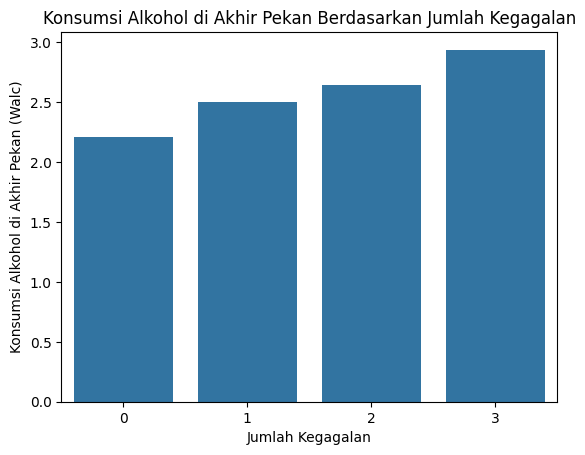

In [17]:
# Apakah jumlah kegagalan kelas sebelumnya mempengaruhi konsumsi alkohol di akhir pekan?
sns.barplot(x='failures', y='Walc', data=df, errorbar=None)
plt.title('Konsumsi Alkohol di Akhir Pekan Berdasarkan Jumlah Kegagalan')
plt.xlabel('Jumlah Kegagalan')
plt.ylabel('Konsumsi Alkohol di Akhir Pekan (Walc)')
plt.show()

Berdasarkan grafik di atas, terlihat bahwa semakin banyak jumlah kegagalan yang dialami siswa (failures), semakin tinggi pula tingkat konsumsi alkohol di akhir pekan (Walc). Jika jumlah kegagalan meningkat, maka tingkat konsumsi alkohol pada akhir pekan cenderung meningkat. Jadi peningkatan jumlah kegagalan cenderung berdampak pada kesejahteraan siswa, yang mungkin menyebabkan mereka mencari pelarian dalam konsumsi alkohol.

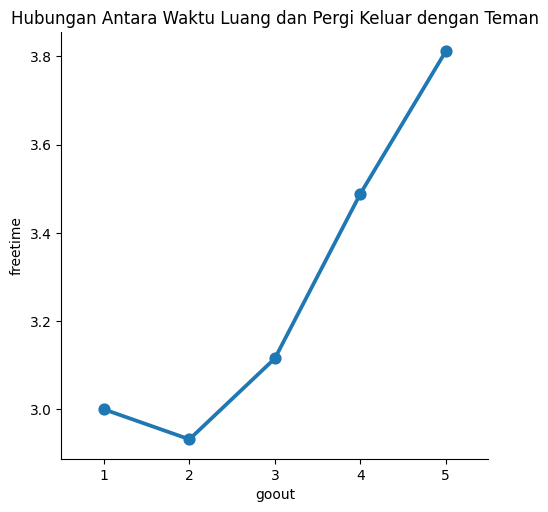

In [18]:
# Apakah siswa yang mempunyai waktu luang (freetime) cenderung pergi keluar (goout) bersama teman-temannya?
sns.catplot(x="goout", y="freetime",
            data=df,
            kind="point",
            errorbar=None)
plt.title("Hubungan Antara Waktu Luang dan Pergi Keluar dengan Teman")
plt.show()

Berdasarkan grafik tersebut, terlihat bahwa terdapat korelasi antara waktu luang (freetime) dan kecenderungan siswa untuk pergi keluar (goout). Visualisasi tersebut menunjukkan bahwa ketika siswa memiliki lebih banyak waktu luang, kemungkinan besar mereka juga akan cenderung untuk pergi keluar, entah untuk bersantai atau bersosialisasi dengan teman-teman mereka. Jadi waktu luang yang lebih banyak (freetime) memiliki pengaruh terhadap keinginan siswa untuk pergi keluar (goout). Artinya, semakin banyak waktu luang yang dimiliki siswa, semakin besar kemungkinan mereka akan memilih untuk pergi keluar bersama teman-teman mereka. Dengan kata lain, ketika nilai freetime meningkat, maka nilai goout juga cenderung meningkat, menunjukkan korelasi positif antara kedua variabel ini.





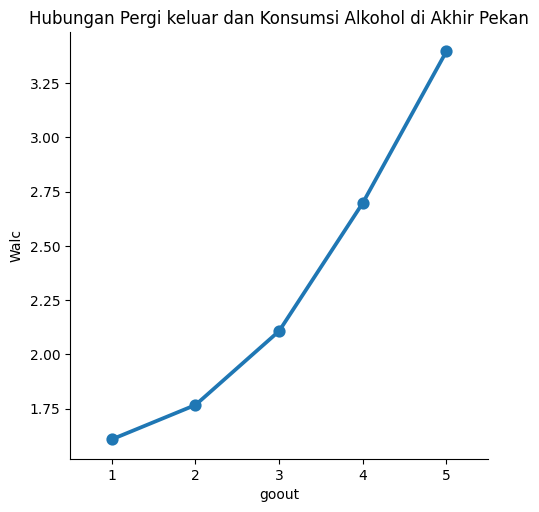

In [19]:
# Apakah saat para siswa pergi keluar (goout) bersama teman-temannya mempunyai hubungan dengan seringnya mereka mengonsumsi alkohol (Walc) pada akhir pekan?
sns.catplot(x="goout", y="Walc",
            data=df,
            kind="point",
            errorbar=None)
plt.title("Hubungan Pergi keluar dan Konsumsi Alkohol di Akhir Pekan")
plt.show()

Dari grafik tersebut, terlihat bahwa terdapat korelasi antara frekuensi siswa pergi keluar (goout) dan konsumsi alkohol pada akhir pekan (Walc). Artinya, ketika siswa sering pergi keluar, mereka cenderung juga memiliki tingkat konsumsi alkohol yang lebih tinggi pada akhir pekan. Hal ini menandakan bahwa semakin sering siswa pergi keluar, semakin tinggi kemungkinan mereka akan mengonsumsi alkohol saat akhir pekan. Jadi goout berpengaruh positif terhadap Walc. Yang berarti jika nilai goout meningkat (misalnya dari 1 ke 5), maka nilai Walc juga cenderung meningkat.

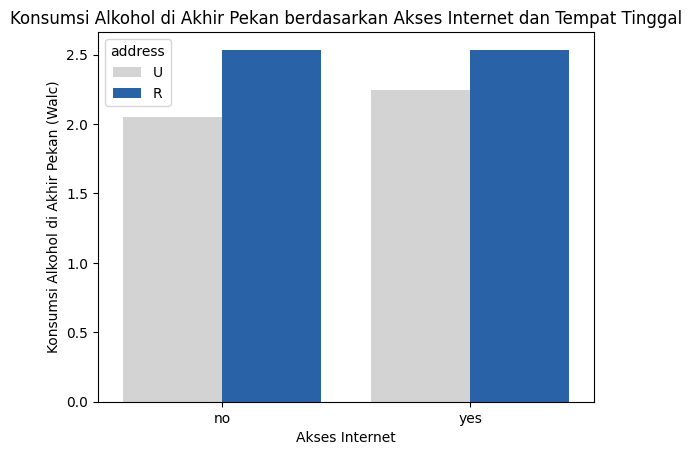

In [20]:
# Apakah akses internet mempengaruhi konsumsi alkohol di akhir pekan berdasarkan tempat tinggal?
sns.barplot(x='internet', y='Walc', hue='address', data=df, errorbar=None, palette=['lightgrey','#1560BD'])
plt.title('Konsumsi Alkohol di Akhir Pekan berdasarkan Akses Internet dan Tempat Tinggal')
plt.xlabel('Akses Internet')
plt.ylabel('Konsumsi Alkohol di Akhir Pekan (Walc)')
plt.show()

Berdasarkan grafik tersebut, dapat disimpulkan bahwa akses internet di rumah memiliki dampak yang berbeda pada tingkat konsumsi alkohol di akhir pekan tergantung pada tempat tinggal siswa.

- Untuk siswa yang tinggal di pedesaan (address = 'R'), terlihat bahwa akses internet tidak memiliki pengaruh yang signifikan pada tingkat konsumsi alkohol di akhir pekan. Ini dapat diasumsikan bahwa adanya akses internet di rumah tidak secara langsung berdampak pada tingkat konsumsi alkohol pada akhir pekan bagi siswa yang tinggal di pedesaan.

- Namun, pada siswa yang tinggal di perkotaan (address = 'U'), terlihat bahwa adanya akses internet di rumah cenderung sedikit mempengaruhi tingkat konsumsi alkohol siswa di akhir pekan. Asumsinya adalah bahwa meningkatnya akses internet di rumah dapat menyebabkan peningkatan konsumsi alkohol pada akhir pekan bagi siswa yang tinggal di perkotaan.

Dengan demikian, dapat disimpulkan bahwa dampak akses internet di rumah terhadap tingkat konsumsi alkohol pada akhir pekan memiliki perbedaan antara siswa yang tinggal di pedesaan dan perkotaan. Akses internet cenderung tidak berpengaruh pada tingkat konsumsi alkohol bagi siswa yang tinggal di pedesaan, tetapi cenderung memiliki sedikit pengaruh pada tingkat konsumsi alkohol bagi siswa yang tinggal di perkotaan.

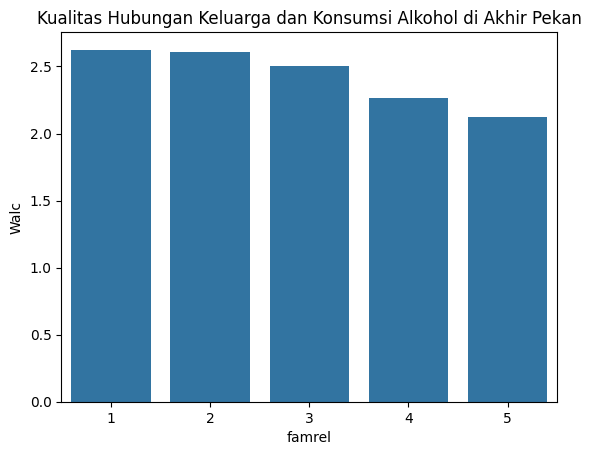

In [21]:
# Apakah kualitas hubungan keluarga mempengaruhi konsumsi konsumsi alkohol diakhir pekan (Walc)
sns.barplot(x='famrel', y='Walc', data=df, errorbar=None)
plt.title('Kualitas Hubungan Keluarga dan Konsumsi Alkohol di Akhir Pekan')
plt.show()

Dari grafik di atas, dapat disimpulkan bahwa terdapat hubungan negatif antara kualitas hubungan keluarga (famrel) dan tingkat konsumsi alkohol pada akhir pekan (Walc) pada siswa. Artinya, semakin tinggi kualitas hubungan keluarga seorang siswa (nilai famrel yang lebih tinggi), maka tingkat konsumsi alkohol pada akhir pekan cenderung lebih rendah. Sebaliknya, semakin rendah kualitas hubungan keluarga (nilai famrel yang lebih rendah), maka tingkat konsumsi alkohol pada akhir pekan cenderung lebih tinggi. Jadi semakin tinggi nilai famrel, maka nilai Walc cenderung menjadi semakin rendah.

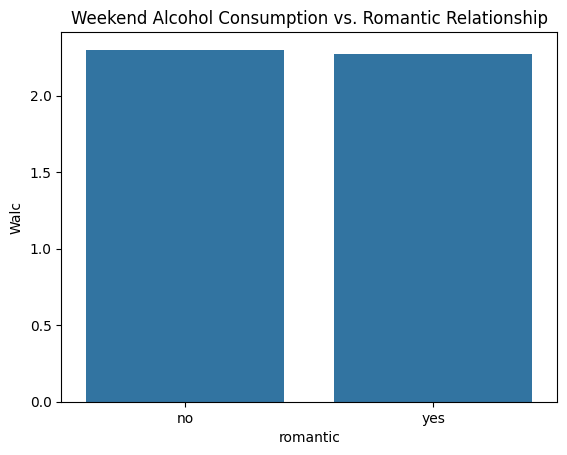

In [22]:
# Apakah hubungan romantic mempengaruhi konsumsi alkohol diakhir pekan (Walc)
sns.barplot(x='romantic', y='Walc', data=df, errorbar=None)
plt.title('Weekend Alcohol Consumption vs. Romantic Relationship')
plt.show()

Berdasarkan grafik di atas, terlihat jika hubungan romantis memiliki pengaruh negatif terhadap konsumsi alkohol di akhir pekan (Walc). Contohnya, ketika siswa terlibat dalam hubungan romantis, konsumsi alkohol mereka cenderung menurun. Meskipun perbedaannya tidak signifikan, namun grafik menunjukkan bahwa siswa yang dalam hubungan romantis memiliki tingkat konsumsi alkohol yang lebih rendah dibandingkan dengan siswa yang tidak dalam hubungan romantis. Oleh karena itu, dapat diasumsikan bahwa adanya hubungan romantis dapat mengurangi kecenderungan siswa untuk mengonsumsi alkohol pada akhir pekan.

##**Verify Data Quality**

####Missing Values

In [23]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio'])

,Null Ratio
school,0.0
sex,0.0
age,0.0
address,0.0
famsize,0.0
Pstatus,0.0
Medu,0.0
Fedu,0.0
Mjob,0.0
Fjob,0.0


Dari tabel diatas, terlihat jika semua kolom memiliki nilai null ratio yang sama yaitu 0.0. Jika Null Ratio adalah 0.0, itu berarti tidak ada data yang hilang atau kosong dalam kolom tersebut. Artinya, setiap baris dalam kolom memiliki nilai yang valid atau terisi.

####Outliers Values

In [24]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
age,0.253165
Medu,0.000000
Fedu,0.506329
traveltime,2.025316
studytime,6.835443
failures,21.012658
famrel,6.582278
freetime,4.810127
goout,0.000000
Dalc,4.556962


Tabel tersebut menunjukkan persentase outlier dalam setiap kolom dataset. Berikut adalah penjelasan untuk setiap kolom:

1. **age** : Persentase outlier sebesar 0.25% menunjukkan bahwa ada sebagian kecil siswa yang memiliki usia yang sangat tidak biasa dibandingkan dengan mayoritas siswa lainnya.

2. **Medu** : Tidak ada outlier dalam kolom ini, yang berarti sebagian besar tingkat pendidikan ibu siswa dalam dataset tidak secara signifikan ekstrem.

3. **Fedu** : Persentase outlier sebesar 0.51% menunjukkan bahwa ada beberapa nilai yang tidak biasa dalam tingkat pendidikan ayah siswa.

4. **traveltime** : Persentase outlier sebesar 2.03% menunjukkan adanya beberapa nilai yang tidak biasa dalam waktu tempuh dari rumah ke sekolah.

5. **studytime** : Persentase outlier yang tinggi sebesar 6.84% menunjukkan bahwa ada sejumlah besar siswa yang memiliki waktu belajar mingguan yang sangat tidak biasa atau ekstrem.

6. **failures** : Persentase outlier yang tinggi sebesar 21.01% menunjukkan bahwa ada sejumlah besar siswa dengan jumlah kegagalan kelas sebelumnya yang jauh lebih tinggi dari kebanyakan siswa.

7. **famrel** : Persentase outlier sebesar 6.58% menunjukkan adanya beberapa nilai yang tidak biasa dalam kualitas hubungan keluarga siswa.

8. **freetime** : Persentase outlier sebesar 4.81% menunjukkan adanya beberapa nilai yang tidak biasa dalam jumlah waktu luang harian siswa.

9. **goout** : Tidak ada outlier dalam kolom ini, yang berarti mayoritas nilai frekuensi keluar bersama teman siswa dalam dataset tidak secara signifikan ekstrem.

10. **Dalc** : Persentase outlier sebesar 4.56% menunjukkan adanya beberapa nilai yang tidak biasa dalam konsumsi alkohol selama hari kerja.

11. **Walc** : Tidak ada outlier dalam kolom ini, yang berarti mayoritas nilai konsumsi alkohol selama akhir pekan siswa dalam dataset tidak secara signifikan ekstrem.

12. **health** : Tidak ada outlier dalam kolom ini, yang berarti mayoritas nilai status kesehatan siswa dalam dataset tidak secara signifikan ekstrem.

13. **absences** : Persentase outlier sebesar 3.80% menunjukkan adanya jumlah ketidakhadiran yang tidak biasa.

14. **G1** : Tidak ada outlier dalam kolom ini, yang berarti mayoritas nilai akademik siswa pada periode pertama dalam dataset tidak secara signifikan ekstrem.

15. **G2** : Persentase outlier sebesar 3.29% menunjukkan adanya beberapa nilai yang tidak biasa dalam nilai akademik siswa pada periode kedua.

16. **G3** : Tidak ada outlier dalam kolom ini, yang berarti mayoritas nilai akhir siswa dalam dataset tidak secara signifikan ekstrem.

####Duplicated Values

In [25]:
df[df.duplicated()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


Dari output diatas, dapat disimpulkan jika setiap baris atau record data mewakili satu entitas unik, misalnya satu siswa dalam kasus data ini. Artinya tidak ada duplikasi data di mana satu siswa memiliki entri ganda atau identik dalam dataset. Dengan demikian, dataset ini tidak memerlukan tindakan lebih lanjut terkait dengan duplikasi data karena data setiap siswa bersifat unik.

####Inconsistent Values / Noise (Optional)

In [26]:
[print(f"Columns -> {col}\n{df[col].unique()}\n{'-' * 30}\n") for col in df.columns]

Columns -> school
['GP' 'MS']
------------------------------

Columns -> sex
['F' 'M']
------------------------------

Columns -> age
[18 17 15 16 19 22 20 21]
------------------------------

Columns -> address
['U' 'R']
------------------------------

Columns -> famsize
['GT3' 'LE3']
------------------------------

Columns -> Pstatus
['A' 'T']
------------------------------

Columns -> Medu
[4 1 3 2 0]
------------------------------

Columns -> Fedu
[4 1 2 3 0]
------------------------------

Columns -> Mjob
['at_home' 'health' 'other' 'services' 'teacher']
------------------------------

Columns -> Fjob
['teacher' 'other' 'services' 'health' 'at_home']
------------------------------

Columns -> reason
['course' 'other' 'home' 'reputation']
------------------------------

Columns -> guardian
['mother' 'father' 'other']
------------------------------

Columns -> traveltime
[2 1 3 4]
------------------------------

Columns -> studytime
[2 3 1 4]
------------------------------

Columns -

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]


Berdasarkan output tersebut, tidak ada nilai yang inkonsisten atau noise yang terlihat secara langsung. Setiap kolom memiliki nilai unik yang sesuai dengan jenis data yang diharapkan.

#**DATA PREPARATION**

##**Data Cleaning**

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

Berikut adalah proses pengecekan missing values, dimana outputnya dalam persentase, yang  bisa dijadikan sebagai acuan untuk pengambilan keputusan terhadap apa yang akan dilakukan pada nilai kosong.

In [27]:
print((df.isna().sum() / len(df)) * 100)

school        0.0
sex           0.0
age           0.0
address       0.0
famsize       0.0
Pstatus       0.0
Medu          0.0
Fedu          0.0
Mjob          0.0
Fjob          0.0
reason        0.0
guardian      0.0
traveltime    0.0
studytime     0.0
failures      0.0
schoolsup     0.0
famsup        0.0
paid          0.0
activities    0.0
nursery       0.0
higher        0.0
internet      0.0
romantic      0.0
famrel        0.0
freetime      0.0
goout         0.0
Dalc          0.0
Walc          0.0
health        0.0
absences      0.0
G1            0.0
G2            0.0
G3            0.0
dtype: float64


Output tersebut menunjukkan hasil dari pengecekan missing values dalam DataFrame. Dari hasil pengecekan ini, dapat disimpulkan bahwa tidak ada missing values dalam DataFrame tersebut. Semua kolom memiliki nilai yang lengkap, sehingga tidak ditemukan kebutuhan untuk mengatasi atau mengisi missing values dalam proses pra-pemrosesan data.

###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [28]:
df[df.duplicated()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


Output tersebut menunjukkan bahwa tidak ada baris yang dideteksi sebagai duplikat dalam dataset. Hal ini ditunjukkan dengan angka 0 pada baris, yang menunjukkan bahwa tidak ada baris yang sepenuhnya identik dengan baris lainnya.

###**Penanganan Outliers**

#####**Pengecekkan Outliers**

In [29]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
age,0.253165
Medu,0.000000
Fedu,0.506329
traveltime,2.025316
studytime,6.835443
failures,21.012658
famrel,6.582278
freetime,4.810127
goout,0.000000
Dalc,4.556962


Output tersebut menampilkan persentase outliers untuk setiap kolom dalam dataset. Jika persentase outliers rendah (dekat dengan nol), artinya mayoritas data berada dalam kisaran yang normal. Namun, jika persentase outliers tinggi, maka bisa menandakan bahwa beberapa data dalam kolom memiliki nilai yang sangat ekstrem.

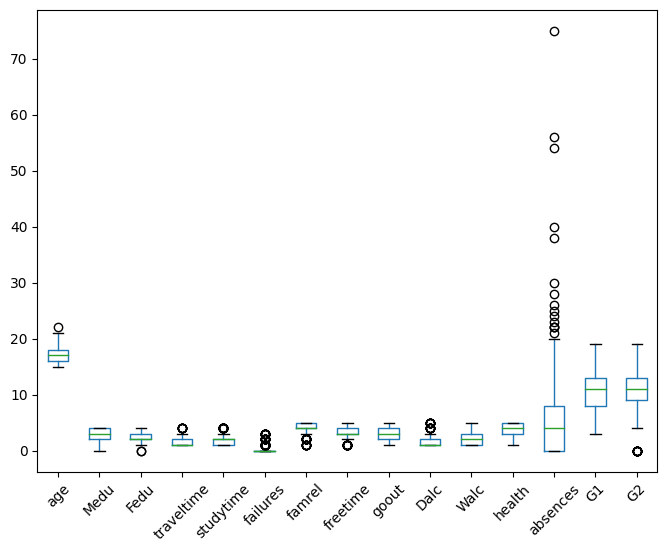

In [30]:
boxplot = df.drop('G3', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Berdasarkan grafik diatas, terlihat pola persebaran data atau nilai outliers. Bisa dilihat jika kolom 'absences' memiliki nilai outliers yang terlihat sebagai titik-titik di luar "whiskers" (jangkauan dalam box plot) atau jauh dari kuartil pertama dan ketiga. Outliers ini menunjukkan adanya nilai-nilai yang sangat berbeda dari mayoritas data dalam kolom 'absences'.

#####**Imputasi Outliers**

Melakukan flooring dan capping pada kolom "absences"

In [31]:
Q1 = df['absences'].quantile(0.25)
Q3 = df['absences'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['absences']=np.where(df['absences']>upper_whisker,upper_whisker,np.where(df['absences']<lower_whisker,lower_whisker,df['absences']))

Proses diatas dilakukan untuk mengatasi outliers dalam data. Proses ini dilakukan dengan menggunakan kuartil pertama (Q1) dan kuartil ketiga (Q3) untuk menghitung rentang antarkuartil (IQR). Nilai batas bawah (lower_whisker) dan batas atas (upper_whisker) kemudian dihitung menggunakan IQR dan faktor pemanjangan 1.5. Nilai-nilai di bawah batas bawah akan diganti dengan batas bawah itu sendiri, sementara nilai-nilai di atas batas atas akan diganti dengan batas atasnya.

#####**Pengecekkan Ulang**

In [32]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
age,0.253165
Medu,0.000000
Fedu,0.506329
traveltime,2.025316
studytime,6.835443
failures,21.012658
famrel,6.582278
freetime,4.810127
goout,0.000000
Dalc,4.556962


Tabel diatas menampilkan nilai outliers pada kolom 'absences' sudah berubah menjadi 0. Setelah dilakukan pengecekan ulang, tidak ada nilai outliers yang terdeteksi dalam kolom 'absences'. Hal ini bisa disebabkan oleh proses flooring and capping yang dilakukan sebelumnya untuk mengatasi outliers dalam kolom tersebut. Dengan demikian, kolom 'absences' sudah tidak memiliki nilai outliers lagi setelah proses tersebut dilakukan.

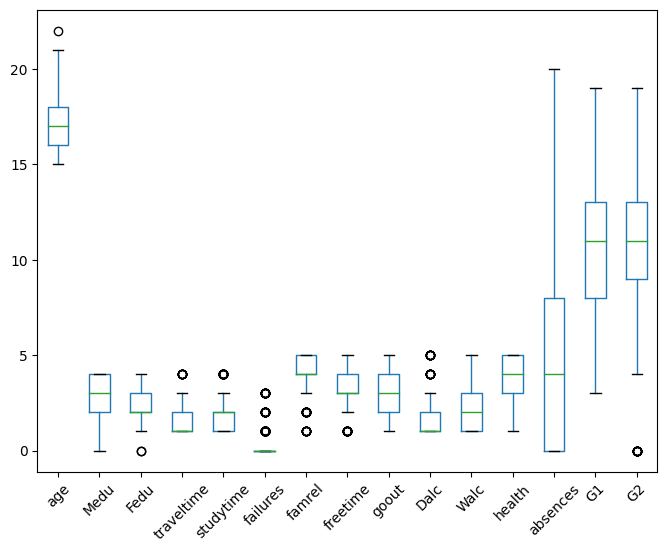

In [33]:
boxplot = df.drop('G3', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Grafik di atas menggambarkan penyebaran data atau nilai outliers dalam dataset, dengan fokus pada kolom 'absences'. Terlihat bahwa setelah melakukan penanganan outliers, penyebaran data telah teratasi dengan baik, terutama pada kolom 'absences'. Grafik menunjukkan bahwa tidak ada nilai yang jauh dari nilai-nilai lainnya, yang menunjukkan bahwa tidak ada lagi outliers yang signifikan dalam kolom 'absences'. Hal ini menunjukkan bahwa proses penanganan outliers, seperti flooring and capping, telah berhasil dalam mengatasi nilai-nilai ekstrim dalam kolom 'absences', sehingga distribusi datanya menjadi lebih merata dan dapat diinterpretasikan dengan lebih baik.

##**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

Setelah melakukan analisis pada dataset ini, tidak ditemukan kolom atau fitur yang memerlukan rekayasa fitur tambahan. Semua fitur yang ada dalam dataset telah relevan untuk analisis yang dilakukan terkait faktor-faktor konsumsi alkohol pada remaja. Oleh karena itu, tidak diperlukan lagi pengembangan atau rekayasa fitur tambahan untuk meningkatkan kualitas analisis atau kinerja model. Data tersebut sudah cukup lengkap dan sesuai untuk analisis yang sedang dilakukan.

###**Pengecekkan Hasil**

In [34]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6.0,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4.0,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10.0,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2.0,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4.0,6,10,10


##**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [35]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

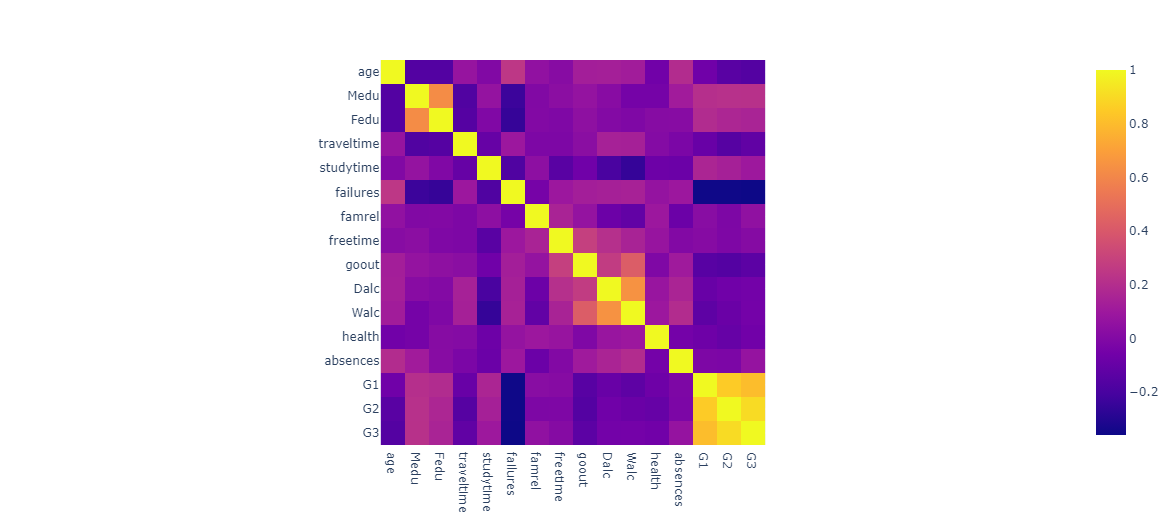

Berdasarkan hasil analisis data, ditemukan bahwa tidak ada fitur yang dianggap kurang relevan dalam dataset. Setiap fitur yang ada dalam dataset memiliki potensi untuk memberikan wawasan yang berharga tentang faktor-faktor yang memengaruhi konsumsi alkohol pada remaja. Oleh karena itu, tidak dilakukan pengurangan pada fitur-fitur dalam dataset karena dianggap bahwa semua fitur tersebut dapat memberikan wawasan dalam analisis yang sedang dilakukan.

###**Pengecekkan Hasil**

In [36]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6.0,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4.0,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10.0,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2.0,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4.0,6,10,10


##**Data Transformation**

###**Mapping**

In [37]:
df['school'] = df['school'].map({'GP': 0, 'MS' : 1})
df['sex'] = df['sex'].map({'F': 0, 'M' : 1})
df['address'] = df['address'].map({'U': 0, 'R' : 1})
df['famsize'] = df['famsize'].map({'LE3': 0, 'GT3' : 1})
df['Pstatus'] = df['Pstatus'].map({'T': 0, 'A' : 1})
df['Mjob'] = df['Mjob'].map({'teacher': 0, 'health' : 1, 'services': 2, 'at_home' : 3, 'other': 4})
df['Fjob'] = df['Fjob'].map({'teacher': 0, 'health' : 1, 'services': 2, 'at_home' : 3, 'other': 4})
df['reason'] = df['reason'].map({'home': 0, 'reputation' : 1, 'course': 2, 'other' : 3})
df['guardian'] = df['guardian'].map({'mother': 0, 'father' : 1, 'other' : 2})

column_map = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for column in column_map:
    df[column] = df[column].map({'yes': 1, 'no': 0})

Mapping dilakukan untuk mengubah nilai kategorikal dalam dataset menjadi nilai numerik yang dapat diproses oleh model. Dalam kasus ini, setiap kolom dengan nilai kategorikal seperti sekolah, jenis kelamin, alamat, ukuran keluarga, status tinggal orang tua, pekerjaan ibu dan ayah, alasan memilih sekolah, penjaga, serta beberapa fitur lainnya telah diubah menjadi nilai numerik. Misalnya, kategori seperti 'yes' dan 'no' diubah menjadi 1 dan 0, sementara kategori lainnya diubah menjadi angka sesuai dengan urutan atau tingkatannya.

In [38]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,1,1,4,4,3,0,...,4,3,4,1,1,3,6.0,5,6,6
1,0,0,17,0,1,0,1,1,3,4,...,5,3,3,1,1,3,4.0,5,5,6
2,0,0,15,0,0,0,1,1,3,4,...,4,3,2,2,3,3,10.0,7,8,10
3,0,0,15,0,1,0,4,2,1,2,...,3,2,2,1,1,5,2.0,15,14,15
4,0,0,16,0,1,0,3,3,4,4,...,4,3,2,1,2,5,4.0,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,0,0,1,2,2,2,2,...,5,5,4,4,5,4,11.0,9,9,9
391,1,1,17,0,0,0,3,1,2,2,...,2,4,5,3,4,2,3.0,14,16,16
392,1,1,21,1,1,0,1,1,4,4,...,5,5,3,3,3,3,3.0,10,8,7
393,1,1,18,1,0,0,3,2,2,4,...,4,4,1,3,4,5,0.0,11,12,10


Tabel diatas merupakan hasil dari proses mapping nilai kategorikal ke nilai numerik dalam dataset. Setiap kolom yang sebelumnya berisi nilai kategorikal sekarang telah diubah menjadi nilai numerik sesuai dengan aturan yang ditetapkan dalam proses mapping.

###**Encoding**

In [39]:
df = pd.get_dummies(df)

Code tersebut digunakan untuk mengonversi variabel kategorikal dalam DataFrame menjadi bentuk biner, di mana setiap nilai kategorikal menjadi kolom baru dengan nilai biner (0 atau 1), yang membantu dalam analisis dan pemodelan data.

###**Pengecekkan Hasil**



In [40]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,1,1,4,4,3,0,...,4,3,4,1,1,3,6.0,5,6,6
1,0,0,17,0,1,0,1,1,3,4,...,5,3,3,1,1,3,4.0,5,5,6
2,0,0,15,0,0,0,1,1,3,4,...,4,3,2,2,3,3,10.0,7,8,10
3,0,0,15,0,1,0,4,2,1,2,...,3,2,2,1,1,5,2.0,15,14,15
4,0,0,16,0,1,0,3,3,4,4,...,4,3,2,1,2,5,4.0,6,10,10


Tabel diatas merupakan hasil dari proses encoding yang dilakukan terhadap DataFrame awal. Setiap nilai kategorikal dalam DataFrame telah diubah menjadi kolom baru dengan nilai biner (0 atau 1). Kolom baru ini mewakili setiap nilai unik dalam variabel kategorikal asli. Jika suatu baris memiliki nilai tertentu dalam variabel kategorikal, maka kolom yang sesuai dengan nilai tersebut akan memiliki nilai 1, sedangkan kolom-kolom lainnya akan memiliki nilai 0.

In [41]:
#Menyimpan data yang telah di cleaning
df.to_csv("Data Cleaned.csv")

#**DATA MODELLING**

Data Modelling dalam kasus ini akan menggunakan Modelling Associate dan Modelling Predict.

##**Inisiasi Variabel untuk menyimpan Dataframe**

In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/noviantisafitri/MiniProject-DataMining/main/Data%20Cleaned.csv') #Dataframe yang telah dicleaning

In [43]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,1,1,4,4,3,0,...,4,3,4,1,1,3,6.0,5,6,6
1,0,0,17,0,1,0,1,1,3,4,...,5,3,3,1,1,3,4.0,5,5,6
2,0,0,15,0,0,0,1,1,3,4,...,4,3,2,2,3,3,10.0,7,8,10
3,0,0,15,0,1,0,4,2,1,2,...,3,2,2,1,1,5,2.0,15,14,15
4,0,0,16,0,1,0,3,3,4,4,...,4,3,2,1,2,5,4.0,6,10,10


##**Modelling Associate**

Menggunakan Modelling Associate untuk membuat kolom target yang akan digunakan pada proses Modelling Predict. Karena pada dataset sebelumnya tidak terdapat kolom target.

###**Pre-Processing**

#####**Adjusment**

In [44]:
x_final = df

x_final merupakan dataframe baru yang berisi seluruh kolom dari dataframe df kecuali kolom "Walc".

#####**Normalisasi Data**

In [45]:
scaler = MinMaxScaler()

x_final_norm = scaler.fit_transform(x_final)

Code tersebut bertujuan untuk melakukan normalisasi atau penskalaan fitur-fitur dalam dataset x_final. Normalisasi data merupakan tahap yang penting dalam analisis data untuk memastikan bahwa semua fitur memiliki rentang nilai yang serupa.

#####**Validasi Silang**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

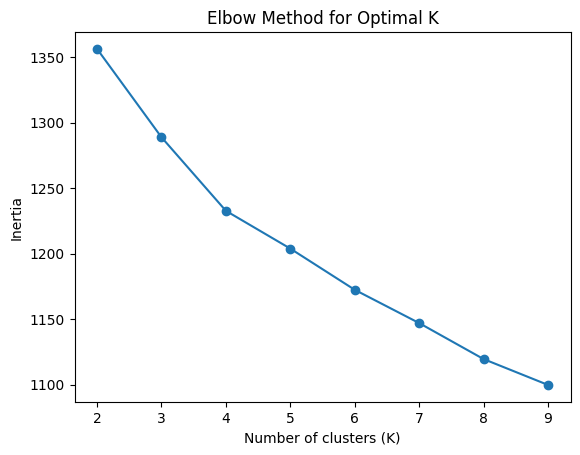

In [46]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

Output tersebut dapat digunakan untuk menemukan titik di mana penambahan jumlah cluster tidak memberikan penurunan yang signifikan dalam inertia (jumlah total jarak kuadrat antara titik data dan pusat cluster terdekat).

###**Build Model**

#####**K-Means**

In [47]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=42)

Code tersebut bertujuan untuk membuat model KMeans dengan jumlah cluster sebanyak 4 dan melatihnya menggunakan data yang telah dinormalisasi.

#####**Hierarchical Clustering**

In [48]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

Code tersebut bertujuan untuk membuat model Hierarchical Clustering dengan menggunakan algoritma aglomeratif, yang kemudian dapat digunakan untuk mengelompokkan data ke dalam beberapa klaster berdasarkan jarak antara titik-titik data.

###**Begins and Compare Clusters**

In [49]:
kmeans_clust = kmeans.predict(x_final_norm) + 1
hierarchy_clust = hc.fit_predict(x_final_norm) + 1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



Code tersebut bertujuan untuk melakukan prediksi cluster untuk setiap titik data dalam dataset menggunakan model KMeans dan Hierarchical Clustering yang telah dibuat sebelumnya.

In [50]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)

Code tersebut bertujuan untuk menggabungkan prediksi cluster dari model KMeans dan Hierarchical Clustering dengan dataframe x_final yang telah direset indexnya, sehingga menghasilkan dataframe yang berisi data asli beserta prediksi cluster untuk setiap titik data.

In [51]:
df = combined_data_assoc

Menetapkan dataframe yang telah digabungkan, yaitu combined_data_assoc, ke dalam variabel df. Sehingga variabel df dapat digunakan untuk referensi dataframe yang berisi data asli serta prediksi klaster dari model KMeans dan Hierarchical Clustering untuk digunakan sebagai dataframe dalam Modelling Predict.

In [52]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,kmeans_cluster,hierarchy_cluster
0,0,0,18,0,1,1,4,4,3,0,...,4,1,1,3,6.0,5,6,6,1,2
1,0,0,17,0,1,0,1,1,3,4,...,3,1,1,3,4.0,5,5,6,1,3
2,0,0,15,0,0,0,1,1,3,4,...,2,2,3,3,10.0,7,8,10,3,2
3,0,0,15,0,1,0,4,2,1,2,...,2,1,1,5,2.0,15,14,15,3,1
4,0,0,16,0,1,0,3,3,4,4,...,2,1,2,5,4.0,6,10,10,3,3


Output tersebut menampilkan data sampel dari dataframe yang telah dilakukan Modelling Associate.

##**Modelling Predict**

Setelah menggunakan Modelling Associate, langkah selanjutnya adalah menggunakan Modelling Predict untuk melakukan prediksi berdasarkan model yang telah dilatih sebelumnya.

###**Pre-Processing**

#####**Split Data**

In [53]:
# Memisahkan fitur dan variabel target
x = df.drop('kmeans_cluster', axis=1) # x berisi fitur-fitur kecuali kolom 'kmeans_cluster'
y = df['kmeans_cluster'] # y berisi nilai dari kolom 'kmeans_cluster' yang akan diprediksi

# Memisahkan dataset menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# x_train: fitur-fitur dari data latih
# x_test: fitur-fitur dari data uji
# y_train: variabel target dari data latih
# y_test: variabel target dari data uji


Code diatas merupakan proses pemisahan data (splitting data). Disini kolom 'kmeans_cluster' digunakan sebagai kolom target atau variabel yang ingin diprediksi. Proses ini juga bertujuan untuk memisahkan dataset menjadi data latih dan data uji serta memisahkan fitur-fitur dari variabel target. Tujuan dari pemisahan ini adalah untuk melatih model menggunakan data latih dan menguji kinerjanya menggunakan data uji, sehingga dapat dievaluasi seberapa baik model dapat melakukan prediksi pada data baru yang belum pernah dilihat sebelumnya.

In [54]:
x_test

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,hierarchy_cluster
78,0,1,17,0,1,0,2,1,4,4,...,5,1,1,1,3,2.0,8,8,10,1
371,1,1,18,1,0,0,1,2,3,2,...,3,3,2,3,3,3.0,14,12,12,1
248,0,1,18,1,0,0,3,3,4,2,...,3,3,1,3,5,8.0,3,5,5,3
55,0,0,16,0,1,1,2,1,4,4,...,3,4,1,1,2,8.0,8,9,10,1
390,1,1,20,0,0,1,2,2,2,2,...,5,4,4,5,4,11.0,9,9,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,1,0,17,1,1,0,1,2,4,2,...,2,2,1,2,3,0.0,12,11,12,4
82,0,0,15,0,0,0,3,2,2,4,...,4,4,1,1,5,10.0,7,6,6,1
114,0,1,15,1,1,0,2,1,1,2,...,4,2,1,1,5,8.0,9,9,9,1
3,0,0,15,0,1,0,4,2,1,2,...,2,2,1,1,5,2.0,15,14,15,1


DataFrame diatas berisi fitur-fitur dari data uji yang akan digunakan untuk menguji kinerja model yang telah dilatih.

In [55]:
y_test

78     2
371    2
248    4
55     3
390    4
      ..
364    4
82     3
114    2
3      3
18     2
Name: kmeans_cluster, Length: 79, dtype: int32

DataFrame diatas berisi variabel target dari data uji yang akan digunakan untuk menguji kinerja model yang telah dilatih.

#####**Normalisasi Data**

In [56]:
# Inisialisasi objek MinMaxScaler untuk melakukan penskalaan
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train) # Penskalaan fitur-fitur dalam data latih

x_test_norm = scaler.transform(x_test)  # Penskalaan fitur-fitur dalam data uji menggunakan nilai minimum dan maksimum dari data latih

Proses diatas merrupakan proses dari normalisasi data. Normalisasi adalah proses mengubah rentang nilai dari fitur-fitur dalam dataset sehingga memiliki skala yang seragam, yaitu antara 0 dan 1. Pada proses ini Min-Max Scaler digunakan untuk mengubah nilai-nilai dalam data latih (x_train) dan data uji (x_test) agar memiliki rentang yang sama. Tujuannya adalah agar dapat memastikan bahwa perbedaan skala antar fitur tidak memengaruhi kinerja model.

In [57]:
x_train_norm

array([[0.        , 1.        , 0.14285714, ..., 0.68421053, 0.6       ,
        0.        ],
       [0.        , 1.        , 0.14285714, ..., 0.73684211, 0.7       ,
        0.33333333],
       [0.        , 0.        , 0.14285714, ..., 0.36842105, 0.        ,
        0.33333333],
       ...,
       [0.        , 0.        , 0.57142857, ..., 0.47368421, 0.45      ,
        0.        ],
       [0.        , 0.        , 0.28571429, ..., 0.78947368, 0.75      ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.68421053, 0.7       ,
        0.        ]])

Output diatas menampilkan data latih yang telah dinormalisasi menggunakan metode Min-Max Scaling.

In [58]:
x_test_norm

array([[0.        , 1.        , 0.28571429, ..., 0.42105263, 0.5       ,
        0.        ],
       [1.        , 1.        , 0.42857143, ..., 0.63157895, 0.6       ,
        0.        ],
       [0.        , 1.        , 0.42857143, ..., 0.26315789, 0.25      ,
        0.66666667],
       ...,
       [0.        , 1.        , 0.        , ..., 0.47368421, 0.45      ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.73684211, 0.75      ,
        0.        ],
       [0.        , 1.        , 0.28571429, ..., 0.26315789, 0.25      ,
        0.        ]])

Output diatas menampilkan data uji yang telah dinormalisasi menggunakan metode Min-Max Scaling dengan nilai minimum dan maksimum yang telah dihitung dari data latih.

###**Build and Train Model**

#####**Gaussian Naive Bayes**

In [59]:
# Inisialisasi model Naive Bayes Gaussian
gnb = GaussianNB()
# Melatih model menggunakan data latih yang telah dinormalisasi
gnb.fit(x_train_norm,y_train)

GaussianNB()

Code tersebut digunakan untuk menginisialisasi dan melatih model GNB untuk digunakan dalam suatu tugas klasifikasi atau prediksi berdasarkan data yang telah diberikan.

#####**K-Nearest Neighbor**

In [60]:
# Inisialisasi model K-Nearest Neighbors
knn = KNeighborsClassifier()
# Melatih model menggunakan data latih yang telah dinormalisasi
knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

Code tersebut digunakan untuk melakukan pelatihan model klasifikasi. Tujuan penggunaan algoritma ini adalah untuk memahami pola-pola yang ada dalam data latih untuk menghasilkan model yang dapat memprediksi label data baru berdasarkan kedekatannya dengan data yang telah dipelajari selama pelatihan.

#####**Decision Tree**

In [61]:
# Inisialisasi model Decision Tree Classifier
dtc = DecisionTreeClassifier()
# Melatih model menggunakan data latih yang telah dinormalisasi
dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

Code tersebut digunakan untuk menjalankan proses pelatihan model klasifikasi. Dimana nantinya model dapat memahami pola-pola dalam data latih dan mengonstruksi aturan-aturan keputusan yang terwakilkan dalam struktur pohon. Model yang terlatih kemudian dapat digunakan untuk memprediksi label dari data baru dengan menggunakan aturan-aturan yang ada dalam pohon keputusan yang telah dibangun.

###**Begins and Compare Predict**

In [62]:
gnb_pred = gnb.predict(x_test_norm)  # Prediksi menggunakan model Gaussian Naive Bayes pada data uji yang telah dinormalisasi
knn_pred = knn.predict(x_test_norm)  # Prediksi menggunakan model K-Nearest Neighbors pada data uji yang telah dinormalisasi
dtc_pred = dtc.predict(x_test_norm)  # Prediksi menggunakan model Decision Tree Classifier pada data uji yang telah dinormalisasi

Code diatas digunakan untuk melakukan prediksi label dari data uji menggunakan model klasifikasi yang telah dilatih sebelumnya dengan algoritma Gaussian Naive Bayes (GNB), K-Nearest Neighbors (KNN), dan Decision Tree (DTC).

In [63]:
# Mengonversi data uji ke dalam dataframe Pandas dan mereset index
x_test = pd.DataFrame(x_test).reset_index(drop=True)

# Mengonversi variabel target data uji ke dalam dataframe Pandas dan mereset index
y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])  # Membuat dataframe dari hasil prediksi Gaussian Naive Bayes
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])  # Membuat dataframe dari hasil prediksi K-Nearest Neighbors
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])  # Membuat dataframe dari hasil prediksi Decision Tree Classifier

# Menggabungkan semua dataframe menjadi satu dataframe
combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)


Code tersebut digunakan untuk membandingkan prediksi yang dihasilkan oleh tiga model klasifikasi yang berbeda (Gaussian Naive Bayes, K-Nearest Neighbors, dan Decision Tree) pada data uji (x_test) dan menampilkan hasil prediksi beserta label yang sebenarnya (y_test) dalam satu DataFrame yang tergabung. Jadi combined_data akan berisi data uji, variabel target, dan hasil prediksi dari ketiga model dalam satu dataset yang dapat digunakan untuk analisis lebih lanjut atau evaluasi kinerja model.

In [64]:
combined_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,G1,G2,G3,hierarchy_cluster,kmeans_cluster,gnb_prediction,knn_prediction,dtc_prediction
0,0,1,17,0,1,0,2,1,4,4,...,3,2.0,8,8,10,1,2,1,4,2
1,1,1,18,1,0,0,1,2,3,2,...,3,3.0,14,12,12,1,2,4,2,2
2,0,1,18,1,0,0,3,3,4,2,...,5,8.0,3,5,5,3,4,4,1,4
3,0,0,16,0,1,1,2,1,4,4,...,2,8.0,8,9,10,1,3,3,1,3
4,1,1,20,0,0,1,2,2,2,2,...,4,11.0,9,9,9,2,4,4,2,4


Output tersebut menampilkan data sampel dari dataframe combined_data, yang akan memberikan gambaran mengenai struktur data tersebut dan bagaimana hasil prediksi dari model-model tersebut cocok dengan data uji.

###**Visualisasi**

In [65]:
feature_names = x_train.columns.tolist()

# Mengubah kelas menjadi format string
class_names_str = [str(class_name) for class_name in dtc.classes_]

# Menyimpan model ke dalam file DOT
dot_file_path = "decision_tree.dot"
export_graphviz(dtc, out_file=dot_file_path, feature_names=feature_names, class_names=class_names_str,
                filled=True, rounded=True, special_characters=True)

# Mengonversi file DOT menjadi visualisasi menggunakan Graphviz
with open(dot_file_path, 'r') as dot_file:
    graph_data = dot_file.read()
graph = graphviz.Source(graph_data)

# Menyimpan visualisasi dalam format gambar (contohnya, PDF)
image_path = "decision_tree"
graph.render(image_path, format='pdf', cleanup=True)

# Menampilkan hasil visualisasi
graph.view()

'decision_tree.pdf'

Hasil Visualisasi : [Lihat Visualisasi](https://drive.google.com/file/d/1LSsRTAxaoiD8v7qmXPfk61BMEkkfLy93/view?usp=sharing)


Code tersebut digunakan untuk memvisualisasikan model Decision Tree Classifier (DTC) yang telah dilatih. Dengan melakukan visualisasi dengan pohon keputusan, kita dapat memahami struktur dan logika yang digunakan oleh model untuk membuat keputusan berdasarkan fitur-fitur yang ada dalam data. Hal tersebut tentunya akan membantu dalam menjelaskan bagaimana model membuat prediksi dan memahami faktor-faktor yang memengaruhi keputusan yang dibuat.